<a href="https://www.kaggle.com/code/xshaimaa/tmdb-movie-dataset-analysis" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Project: Investigate a Dataset - [TMDB movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

___

<a id='intro'></a>
## Introduction

### Dataset Description 
This data set contains information about 10,000 movies extracted from [TMDB](https://www.themoviedb.org/). The dataset contains movies from 1960 to 2015. Including user ratings and revenue. Original data from [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata)

### Columns Descreption:
- `id, imdb_id`: unique id or imdb id for each movie on TMDB
- `popularity`: a metric used to measure the popularity of the movie.
- `budget`:the total budget of the moviein USD.
- `revenue`:the total revenue of the movie in USD.
- `original_title`: the original title of the movie.
- `cast`:the names of the cast of the movie separated by "|".
- `homepage`: the website of the movie (if it existed).
- `director`:name(s) of the director(s) of the movie (separated by "|" if there are more than one director).
- `tagline`:a catchphrase describing the movie.
- `keywords`: keywords related to the movie.
- `overview`:summary of the plot of the movie.
- `runtime`:total runtime of the movie in minutes.
- `genres`: genres of the movie separated by "|".
- `production_companies`:production compan(y/ies) of the movie.
- `release_date`:release date of the movie.
- `vote_count`:number of voters of te movie.
- `vote_average`:the average user rating of the movie
- `release_year`:release year of the movie (from 1960 to 2015)
- `budget_adj`:the total budget of the moviein USD in terms of 2010 dollars, accounting for inflation over time.
- `revenue_adj`:the total budget of the movie in USD in terms of 2010 dollars, accounting for inflation over time.

### Questions for Analysis:
- Do movies with high popularity achive high revenvue?
- What are the most filmed genres in this whole dataset?
- Is there a correlation between a movie budget and its revenue?

___
## Environment set-up

In [1]:
# importing lib.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
___
## Data Wrangling
In this section, we would load our desired data from a flat csv file using `pandas` to further explore our data.

In [2]:
# loading data and showing its first 5 lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


___
<a id='Cleaning'></a>

## Data Cleaning
In this section, we would dive deeper into exploring our dataset and perform cleaning operations like (dropping columns, handling NaNs, converting data types). All of which would help us reach a more accurate result in answering our investigating questions.

In [3]:
# printing dataframe columns' info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# taking a look at number of unique values
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [5]:
# closer look at the vote_average values
df.vote_average

0        6.5
1        7.1
2        6.3
3        7.5
4        7.3
        ... 
10861    7.4
10862    5.7
10863    6.5
10864    5.4
10865    1.5
Name: vote_average, Length: 10866, dtype: float64

In [6]:
# calculating duplicated values 
df.duplicated().sum()

1


#### As we can see from the above output: 
1. Our dataset consists of a total of 10866 rows and 21 columns.
2. We have only 1 duplicated row which would be droped.
3. Some columns wont be useful in answering our questions using analysis.
4. Few columns have many missing values that needs to be handled.
5. Columns `cast` `director` `genre` have values saperated with a '|'.
6. `release_date`'s data type needs to be casted.
7. We can append a column for the movie `profit` using formula $profit = revenue - budget$.
8. `vote_average` better be presented as a catecorical variable that groubs multible ratings values.
9. We may also catigorize `profit` column for better EDA

___
**Start by dropping the duplicated row**

In [7]:
# dropping duplicares and validating the excution
df.drop_duplicates(inplace = True)
df.duplicated().any()

False

___
**Check for data frame columns** 

In [8]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


after going through all the columns, we decided that columns: `id` `imdb_id` `homepage` `revenue_adj` `budget_adj` `tagline` `cast` `overview` `keywords` `production_companies` `director` `release_date` will not be very usefull, so we will drop them and continue with our analysis

In [9]:
# dropping unuseful columns
df.drop(['id', 'imdb_id', 'homepage', 'revenue_adj', 'budget_adj', 'tagline', 'cast', 'overview', 'keywords', 'production_companies', 'director', 'release_date'], axis = 1, inplace = True)

In [10]:
# check for data frame shape
df.shape

(10865, 9)


Now we only have 9 columns to start preprocessing on
___

**Check for null values**

In [11]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64


We can see that all of our columns are clean exept from the `genre` column. Since it is very important to answer our questions, we would drop all its NaNs. 


In [12]:
# dropping NaNs ans confirming excution
df.dropna(inplace = True)
df.isnull().any().sum()

0

___
**Dealing with `genres` column's '|' saperated values**

We would do our analysis with the first genre for each movie. We're going to take each hybrid row and extract the first genre (before the '|') and save it to our dataframe.

In [13]:
# split values in the hyprid dataframe
df['genres'] = df['genres'].apply(lambda x: x.split("|")[0])
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,7.3,2015


___
**Calculating movie profit. $profit = revenue - budget$**

In [14]:
# adding new column for movie profit (revenue - budget)
df['profit'] = df.revenue - df.budget
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,7.3,2015,1316249360


___
**Catigorizing `vote_average` `profit_adj` columns**

For usability and functionality sake, we would convert these columns using a function.

In [15]:
def catigorize_col (df, col, labels):
    """
    catigorizes a certain column based on its quartiles
   
    Args:
        (df)     df   - dataframe we are proccesing
        (col)    str  - to be catigorized column's name 
        (labels) list - list of labels from min to max
    
    Returns:
        (df)     df   - dataframe with the categorized col
    """
    
    # setting the edges to cut the column accordingly
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates='drop')
    return df
    

___
**Converting `vote_average` into a categorical variable** 

We would cut the `vote_average` values and make 4 categories: `popular` `average` `below_avg` `not_popular` to describe it more using `catigorize_col()` function provided above.

In [16]:
# define labels for these edges
labels = ['not_popular', 'below_avg', 'average', 'popular']
catigorize_col(df, 'vote_average', labels)

df['vote_average'].unique()

['average', 'popular', 'below_avg', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

We endded up with some NaNs, so wo would drop them.

In [17]:
# dropping nans and confirming
df.dropna(inplace = True)
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
profit            0
dtype: int64

___
**Converting `profit` into a categorical variable** 

We would cut the `profit` values and make 3 categories: `high` `average` `low` to describe it more using `catigorize_col()` function provided above.

In [18]:
# define labels for these edges
labels = ['low', 'average', 'high']
catigorize_col(df, 'profit', labels)

df['profit'].unique()

['high', 'average', 'low', NaN]
Categories (3, object): ['low' < 'average' < 'high']

In [19]:
df.profit.isnull().sum()

1

We endded up with one NaN value, wich we will drop

In [20]:
# dropping NaNs in profic column and confirming
df.dropna(inplace = True)
df.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
profit            0
dtype: int64

___

In [21]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,average,2015,high
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,popular,2015,high
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,average,2015,high
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,popular,2015,high
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,popular,2015,high


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10864
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   popularity      10839 non-null  float64 
 1   budget          10839 non-null  int64   
 2   revenue         10839 non-null  int64   
 3   original_title  10839 non-null  object  
 4   runtime         10839 non-null  int64   
 5   genres          10839 non-null  object  
 6   vote_count      10839 non-null  int64   
 7   vote_average    10839 non-null  category
 8   release_year    10839 non-null  int64   
 9   profit          10839 non-null  category
dtypes: category(2), float64(1), int64(5), object(2)
memory usage: 783.6+ KB


Now that we finished our data cleaning, our dataset consists of 10840 records with 10 columns, it has no duplicates nor null values, and the data types are consistant with suitable categorical variable to address our questions. We are ready to move to the next step!
___

<a id='eda'></a>
## Exploratory Data Analysis
In this section, we would use describtive statistics and visuals to address the following questions regarding our dataset

### Q1: Do movies with high popularity achive high revenvue?

In [23]:
# get median of popularity to compare with
df['popularity'].mean()

0.6476021913460651

In [24]:
# split popular movies into two groups around the median
less_popular = df.query('popularity <= 0.647')
more_popular = df.query('popularity >  0.647')

In [25]:
# get mean quality revenue for the less and more popularity groups
print(less_popular.revenue.mean(), more_popular.revenue.mean())

7689823.871224779 121933819.08567691


From the above calculations, it's very clear that more popular movies recieve way more revenue than the less popular movies.
___

### Q2: What are the most filmed genres in this whole dataset?

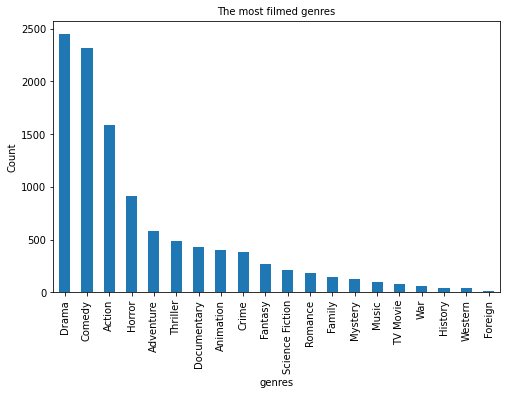

In [26]:
# visualising genres distribution
plt.figure(figsize=(8,5))
df['genres'].value_counts().plot(kind="bar")
plt.title("The most filmed genres", fontsize=(10))
plt.xlabel("genres", fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.show()

In [27]:
df['genres'].describe()

count     10839
unique       20
top       Drama
freq       2453
Name: genres, dtype: object

from the above graph, we can see that `Drama`, `Comedy` and `Action` are the most three filmed genres in total of 10839 movies in our dataset, and that `Drama` genre is filmed 22.6% of the times on our dataset.
___

### Q3: Is there a correlation between a movie budget and its revenue?

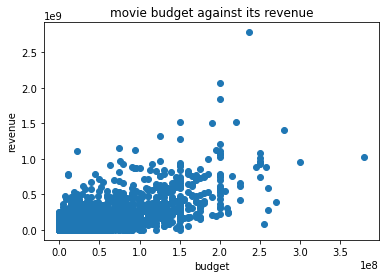

In [28]:
# plotting budget against revenue
plt.scatter(df['budget'],df['revenue']);
plt.title("movie budget against its revenue");
plt.xlabel('budget', fontsize=10);
plt.ylabel('revenue',fontsize=10);

We can notice the positive correlation between `budget` and `revenue`, indecating a relation between them with little outliers. 
___

<a id='conclusions'></a>
## Conclusions

### Q1: Do movies with high popularity achive high revenvue?
> More popular movies recieve way more revenue than the less popular movies.
### Q2: What are the most filmed genres in this whole dataset?
> `Drama`, `Comedy` and `Action` are the most three filmed genres in total of 10839 movies in our dataset, and that `Drama` genre is filmed 22.6% of the times on our dataset.
### Q3: Is there a correlation between a movie budget and its revenue?
> There is positive correlation between `budget` and `revenue`, indecating a relation between them with little outliers. 
___
